# Introduction to Regression with statsmodels in Python


In [2]:
# Importing pandas
import pandas as pd

# Importing the course arrays
conversion = pd.read_csv("datasets/ad_conversion.csv")
churn = pd.read_csv("datasets/churn.csv")
fish = pd.read_csv("datasets/fish.csv")
sp500 = pd.read_csv("datasets/sp500_yearly_returns.csv")
taiwan = pd.read_csv("datasets/taiwan_real_estate2.csv")

## Take Notes

Add notes about the concepts you've learned and code cells with code you want to keep.

_Add your notes here_

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
-- Explore the data in the table
SELECT *
FROM 'taiwan_real_estate2.csv'

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847
...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607
410,90.45606,9,0 to 15,15.128593
411,390.96960,7,15 to 30,12.284418
412,104.81010,5,0 to 15,15.885023


In [4]:
# view taiwan_real_estate top 5 rows
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


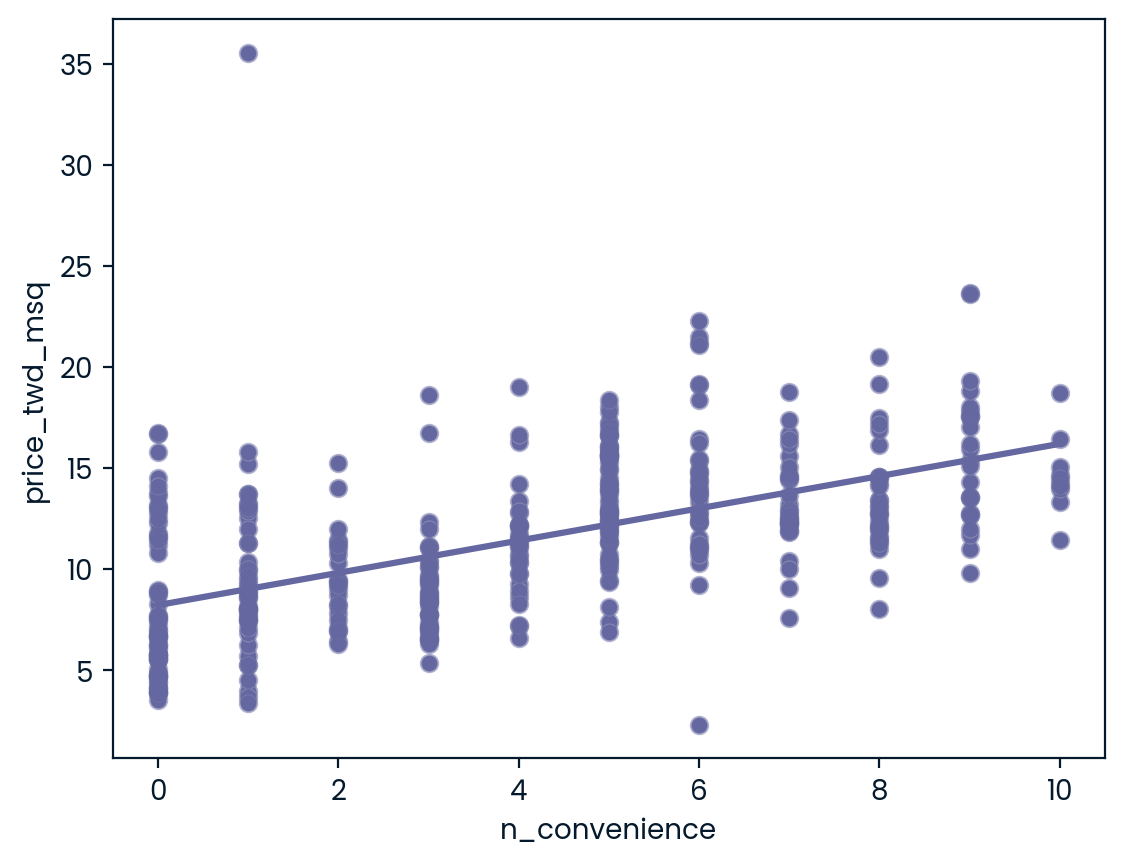

In [5]:
# Exploring dataset
# One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, we will make the points transparent. With "scatter_kws"
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

sns.regplot(x="n_convenience",
         y="price_twd_msq",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

plt.show()

## OLS -> Ordinary Least Squares

In a linear regression model, we deal with finding the slope and the intercept of the regression line we saw above.

Hence, the formula that we use in linear regression is: -

**y' = m*x + c**

where, m -> slope of the regression line
       c -> intercept of the regression line, with the y-axis

We try to fine the optimum (m, c) values, such that the **sum of the squares** of the calculated(y') and actual response variable(y) values is minimum.

i.e. ∑(y-y')^2 -> minimize

Where, the y we obtain from the above mentioned equation is the calculated response variable(y'). Whereas, the response value mentioned in the dataset is the actual response variable value(y).

In our case above, we have x -> n_convenience, y -> price_twd_msq. We have to find out y' form the above mentioned linear regression equation.

## statsmodels.formula.api.ols

response_variable <-> target_variable
explanatory_variable <-> feature_varialbe

**_Method 1_** :

statsmodels.formula.api.ols(<br>
    &emsp;formula,<br>
    &emsp;data,<br>
    &emsp;subset=None,<br>
    &emsp;drop_cols=None,<br>
    &emsp;*args, **kwargs<br>
    )

formula, data -> required arguments

formula -> str (response_variable_column_name ~ explanatory_variable_column_name)
data -> pandas.Dataframe
<br><br>


**_Method 2_** :

statsmodels.api.OLS(response_variable_1d_array, explanatory_variable_1d_array)

In [6]:
# Method 1

# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [7]:
# Method 2

# Import the ols function
import statsmodels.api as sm

# explicitely create the target variable and the feature variable
x = taiwan_real_estate['n_convenience']
y = taiwan_real_estate['price_twd_msq']

# adding the constant term
x = sm.add_constant(x)

# Create the model object
mdl_price_vs_conv = sm.OLS(y, x)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           3.41e-37
Time:                        16:49:31   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.2242      0.285     28.857

**The model had an Intercept coefficient of 8.2242. What does this mean?**
On average, a house with zero convenience stores nearby had a price of 8.2242 TWD per square meter.

**The model had an n_convenience coefficient of 0.7981. What does this mean?**
If you increase the number of nearby convenience stores by one, then the expected increase in house price is 0.7981 TWD per square meter.

_The intercept is positive, so a house with no convenience stores nearby still has a positive price. The coefficient for convenience stores is also positive, so as the number of nearby convenience stores increases, so does the price of the house._

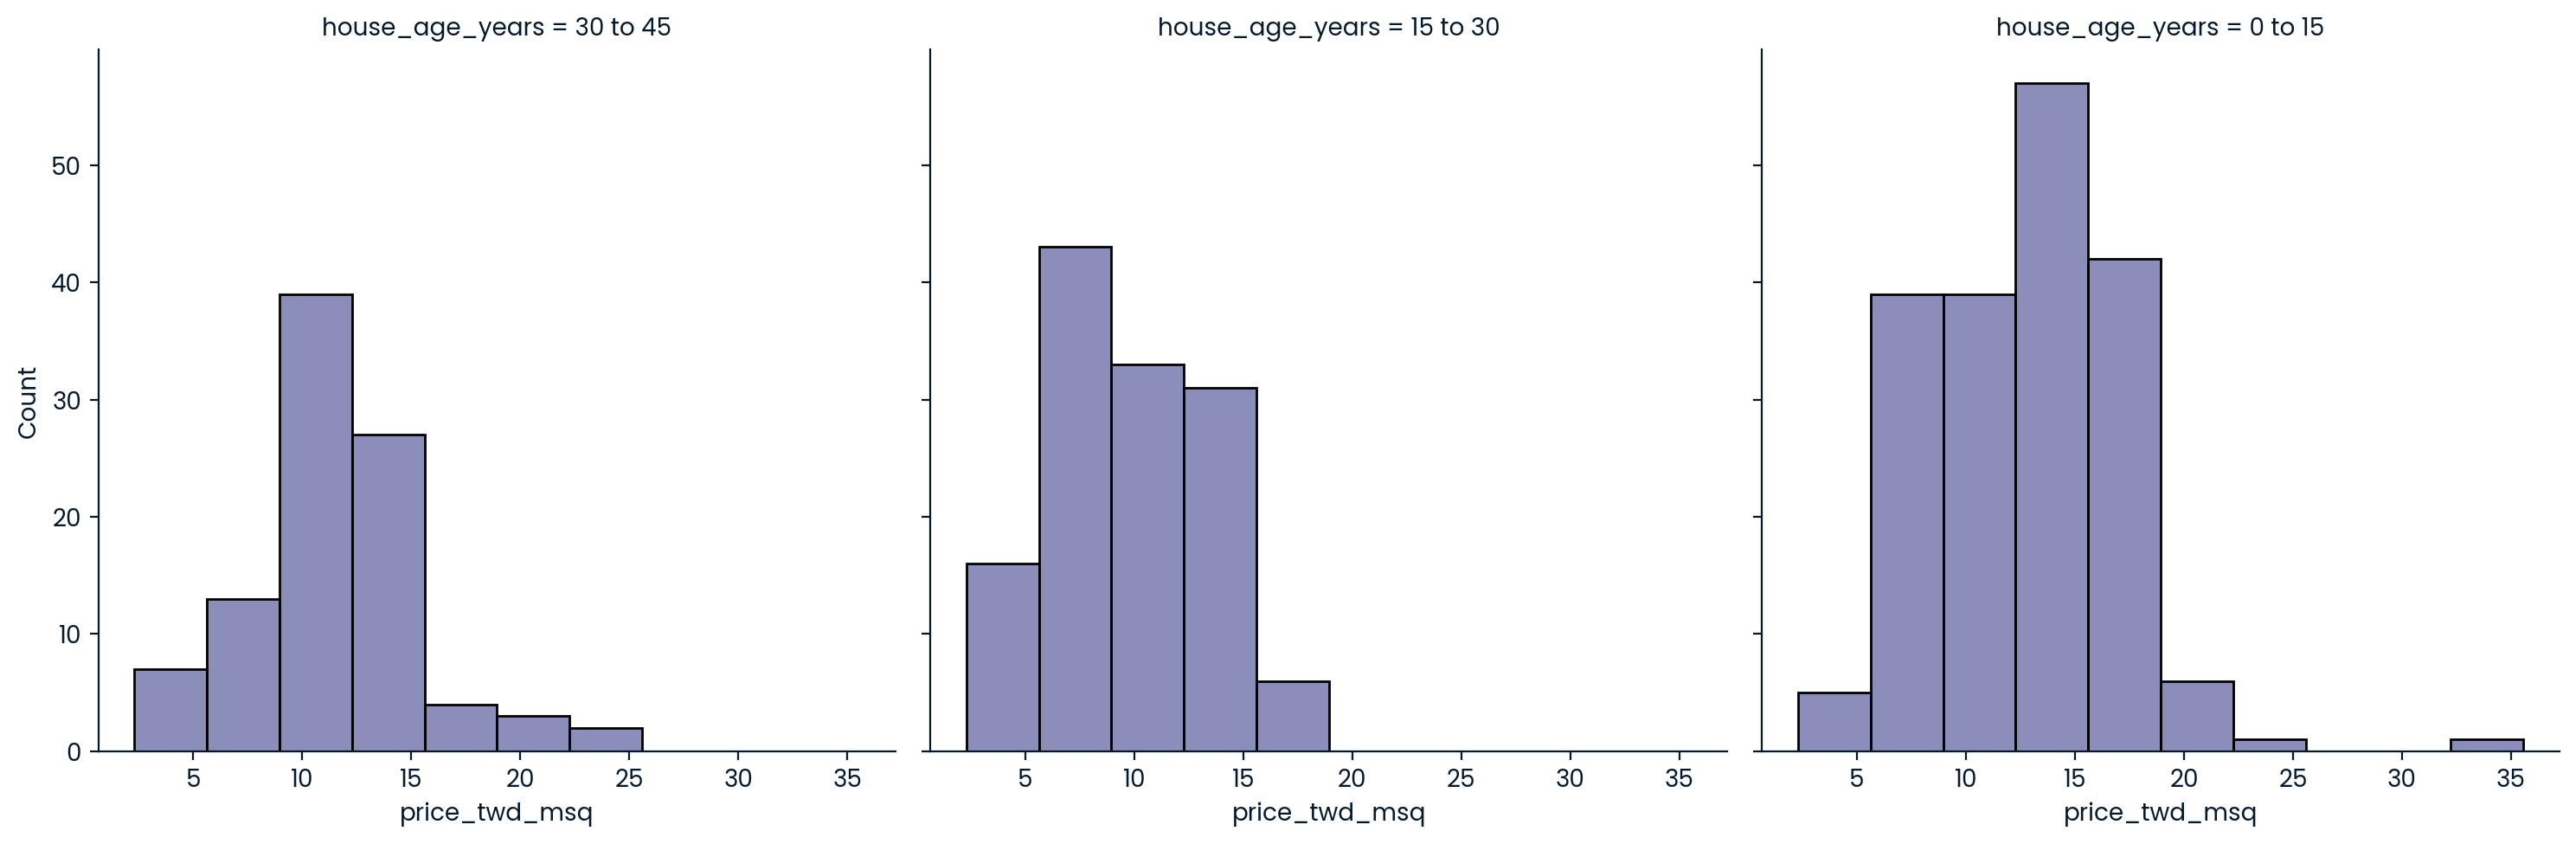

In [8]:
# Visualizing categorical variable
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         col='house_age_years',
         col_wrap=3,
         bins=10)

# Show the plot
plt.show()

It appears that new houses are the most expensive on average, and the medium aged ones (15 to 30 years) are the cheapest.

In [9]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [10]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


## Understanding the results

In the above code block we see that we received 1 intercept, and 2 other values (one for each of the "15 to 30" and "30 to 45" categories).

But by past analysis, we know that we have 3 categories in the house_age_years column. So why did we receieve parameter values for only 2 of them?

Looking closely at the results obtained, we see that the intercept = 12.637471, which is the grouped mean of the "0 to 15" category. So, we know that the Intercept = Mean(price_twd_msq of "0 to 15" house_age_years category).

What about the other parameters values?

1. house_age_years[T.15 to 30] &emsp; = &emsp;-2.760728<br>
   1.1) We see, Mean(price_twd_msq of "15 to 30" house_age_years category) - Intercept = 9.876743 - 12.637471 = -2.760728
2. house_age_years[T.30 to 45] &emsp; = &emsp;-1.244207<br>
    2.1)  We see, Mean(price_twd_msq of "30 to 45" house_age_years category) - Intercept = 11.393264 - 12.637471 = -1.244207

So, we can safely conclude that these parameters are relative to the Intercept.

In [12]:
# Updated the model formula to remove the intercept
# Here "0" means that we want to calculate w.r.t "0"
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


Hence we can conclude that: -<br>
_The coefficients of the model are just the means of each category you calculated previously._